### This is the accompanying notebook for the  Predictive Data Analytics assiignment.

#### The notebook will be divided into 3 main parts. The first part will be where we import needed libraries, do some exploration of the dataset. The second part will be dedicated to performing some regression tests and the final part will be where classification tests will be performed.

#### Section 1 -  Regression Data Import and Exploration

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Import the dataset
dataset1 = pd.read_csv('./tmdb_5000_movies.csv')

In [36]:
print(dataset1)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

In [37]:
dataset1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/12/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19/05/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26/10/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16/07/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07/03/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [38]:
# Check the dataset information
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [39]:
dataset1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### Section 2 - Regression Models

#### Linear Regression - The first type of regression that will be looked at is a simple linear and what is being examined is whether or not having a larger budget means that a movie will make more revenue

In [40]:
# Create a copy of the dataset
dataset_regression = dataset1.copy()

In [41]:
# Select columns that will be X and Y
X = dataset_regression.iloc[:, [12]].values
y = dataset_regression.iloc[:, :1].values

In [42]:
print(X)

[[2787965087]
 [ 961000000]
 [ 880674609]
 ...
 [         0]
 [         0]
 [         0]]


In [43]:
print(y)

[[237000000]
 [300000000]
 [245000000]
 ...
 [        0]
 [        0]
 [        0]]


In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

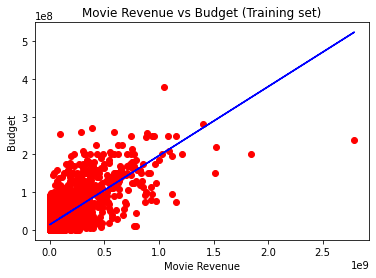

In [47]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Movie Revenue vs Budget (Training set)')
plt.xlabel('Movie Revenue')
plt.ylabel('Budget')
plt.show()

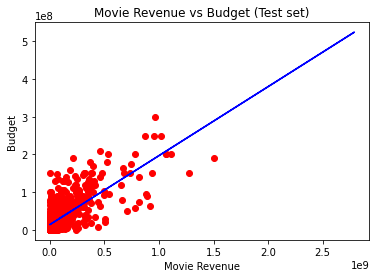

In [48]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Movie Revenue vs Budget (Test set)')
plt.xlabel('Movie Revenue')
plt.ylabel('Budget')
plt.show()

In [49]:
#Then build the linear regression function
print('m= ')
print(regressor.coef_)

m= 
[[0.1828517]]


In [50]:
# Intercepting point (Where the y axis is intercepted)
print('b = ')
print(regressor.intercept_)

b = 
[13984967.02561394]


In [51]:
print('The linear regression function is: ')
print('y = ', regressor.coef_, 'x + ', regressor.intercept_)

The linear regression function is: 
y =  [[0.1828517]] x +  [13984967.02561394]


In [52]:
#Calculate the precision of the algorithm or r^2
print()
print('Precision of the model:')
print(regressor.score(X_train, y_train))


Precision of the model:
0.532073715255598


#### Polynomial Regression - This is the second of 2 types of regression being used to test the movie dataset

In [107]:
# Create a copy of the dataset
dataset_multiple = dataset1.copy()

In [108]:
X = dataset_multiple.iloc[: ,[12,13,18,19]]
print(X)
print(X.shape)
y = dataset_multiple.iloc[:, :1].values
print(y)
print(y.shape)

         revenue  runtime  vote_average  vote_count
0     2787965087    162.0           7.2       11800
1      961000000    169.0           6.9        4500
2      880674609    148.0           6.3        4466
3     1084939099    165.0           7.6        9106
4      284139100    132.0           6.1        2124
...          ...      ...           ...         ...
4798     2040920     81.0           6.6         238
4799           0     85.0           5.9           5
4800           0    120.0           7.0           6
4801           0     98.0           5.7           7
4802           0     90.0           6.3          16

[4803 rows x 4 columns]
(4803, 4)
[[237000000]
 [300000000]
 [245000000]
 ...
 [        0]
 [        0]
 [        0]]
(4803, 1)


In [109]:
# Check for any missing values
dataset_multiple.isnull().values.any()

True

In [110]:
#Check how many missing values per column
dataset_multiple.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [100]:
dataset_multiple = dataset_multiple.dropna()

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.99  1.61  0.33]
 [-0.25  0.21 -0.79]
 [ 1.72  0.79 -0.41]
 ...
 [-0.14  1.03 -0.06]
 [ 0.27  0.91  0.56]
 [ 1.1   1.03 -0.42]]
[[ 9.42e-01  1.03e+00  2.26e-02]
 [-5.59e-01 -1.31e+00 -7.65e-01]
 [-1.08e+00  1.49e+00 -5.26e-01]
 [-1.23e+00 -2.45e-02  2.07e+00]
 [-3.00e-01 -2.45e-02  2.85e-01]
 [ 4.76e-01  1.85e+00  7.68e-01]
 [ 8.91e-01  5.60e-01  3.55e+00]
 [-9.73e-01  2.09e-01  2.41e-01]
 [ 7.87e-01  7.94e-01  5.80e-02]
 [ 1.05e-02 -1.41e-01 -5.20e-01]
 [-1.39e+00  1.49e+00 -1.82e-01]
 [ 8.39e-01 -1.41e-01 -4.23e-01]
 [-1.97e-01 -2.58e-01 -5.19e-01]
 [ 1.05e-02 -9.60e-01 -3.78e-01]
 [-7.66e-01 -6.09e-01 -5.90e-01]
 [-9.73e-01 -3.75e-01 -1.88e-01]
 [ 1.14e-01 -3.75e-01 -8.59e-01]
 [-4.13e-02 -6.09e-01 -4.21e-01]
 [ 1.56e+00  1.26e+00  5.05e+00]
 [ 1.82e+00  2.08e+00  6.05e+00]
 [ 8.91e-01 -7.26e-01  8.77e-01]
 [ 9.94e-01  1.61e+00  1.34e+00]
 [-6.63e-01 -7.26e-01 -5.18e-01]
 [-1.13e+00 -2.45e-02 -4.66e-01]
 [-3.52e-01 -1.41e-01 -5.69e-01]
 [-6.11e-01 -9.60e-01 -6.84e-01]
 [ 4.76e-0

In [111]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [112]:
# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.82e+07  1.50e+07]
 [ 4.12e+07  2.00e+07]
 [ 7.93e+06  6.40e+07]
 [ 3.43e+07  4.00e+07]
 [ 9.21e+07  3.20e+07]
 [ 2.27e+07  1.50e+07]
 [ 1.45e+08  2.00e+08]
 [ 8.81e+07  9.00e+07]
 [ 5.77e+07  6.00e+07]
 [ 4.45e+07  3.00e+07]
 [ 1.94e+07  7.00e+07]
 [ 6.45e+07  4.00e+07]
 [ 4.61e+07  2.50e+07]
 [ 7.47e+07  9.00e+07]
 [ 4.80e+07  4.00e+07]
 [ 7.42e+07  1.75e+08]
 [ 2.71e+07  0.00e+00]
 [ 6.20e+07  1.35e+08]
 [ 1.85e+08  2.20e+08]
 [ 2.90e+08  1.60e+08]
 [ 1.78e+08  2.00e+08]
 [ 6.08e+07  5.40e+07]
 [ 5.40e+07  7.50e+07]
 [ 5.57e+07  7.50e+07]
 [ 4.07e+07  2.00e+07]
 [ 4.38e+07  2.50e+07]
 [ 1.33e+08  1.85e+08]
 [ 7.65e+07  1.50e+08]
 [ 4.12e+07  3.00e+07]
 [ 1.99e+08  3.00e+08]
 [ 4.78e+07  2.30e+07]
 [ 3.88e+07  3.00e+07]
 [ 5.15e+06  3.70e+07]
 [ 4.75e+07  2.50e+07]
 [ 8.18e+07  6.00e+07]
 [ 4.67e+07  2.90e+07]
 [ 2.54e+07  1.70e+07]
 [ 8.74e+07  6.50e+07]
 [ 3.35e+07  1.90e+07]
 [ 5.04e+07  6.00e+07]
 [ 7.84e+07  1.00e+08]
 [ 3.27e+07  1.50e+07]
 [ 8.24e+07  3.50e+07]
 [ 4.21e+07

In [113]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.511889158604193

#### Section 3 - Classification Exploration

In [115]:
# Import the dataset
dataset = pd.read_csv('./bank_churn.csv')

In [116]:
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [117]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Support Vector Machine - Using the bank churn dataset

In [23]:
# Select columns for X (y will be the last column as it indicates the crucial exiting factor)
#If you want to select specific rows and columns
X = dataset.iloc[:, [7, 8, 9, 10, 11, 12 ]]
y = dataset.iloc[:, 13].values
print(X)
print(y)

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
999

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
2967       5  117833.30              3          0               0   
700        5       0.00              2          1               0   
3481       9   53299.96              2          1               1   
1621       5   75075.14              1          1               1   
800        7       0.00              2          1               1   
...      ...        ...            ...        ...             ...   
9225       4  120074.97              2          1               1   
4859       4  114440.24              1          1               1   
3264       5  161274.05              2          1               0   
9845       9       0.00              2          1               1   
2732       1  108076.33              1          1               0   

      EstimatedSalary  
2967          5831.00  
700          95611.47  
3481         42855.97  
1621          8651.92  
800         173952.50  
...               ...  
922

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.00886037  0.67316003  2.53503394 -1.55362351 -1.03446007 -1.64080994]
 [ 0.00886037 -1.20772417  0.80424154  0.64365658 -1.03446007 -0.07927152]
 [ 1.39329338 -0.35693706  0.80424154  0.64365658  0.96668786 -0.99684012]
 ...
 [ 0.00886037  1.36657199  0.80424154  0.64365658 -1.03446007  1.4133552 ]
 [ 1.39329338 -1.20772417  0.80424154  0.64365658  0.96668786  0.84496184]
 [-1.37557264  0.51741687 -0.92655087  0.64365658 -1.03446007  0.32500428]]
[[ 1.04718513  0.88494297 -0.92655087  0.64365658  0.96668786  1.61203027]
 [-1.02946438  0.43586703 -0.92655087  0.64365658 -1.03446007  0.49626891]
 [ 1.04718513  0.31486378 -0.92655087  0.64365658  0.96668786 -0.42502785]
 ...
 [-1.37557264  0.30819395 -0.92655087  0.64365658 -1.03446007 -0.272747  ]
 [ 0.70107688  0.55698791  0.80424154  0.64365658 -1.03446007 -0.93306558]
 [-0.68335613  0.7006957  -0.92655087 -1.55362351 -1.03446007 -0.47380732]]


In [26]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [79]:
# Predicting a new result using the 6 factors that we are using as columns
# This show that the person is likely to leave the bank if they are 10 years
# with the bank with a balance of 75 thousand, use 1 product, does not have a card
# and a salary of 90k
print(classifier.predict(sc.transform([[10,75000, 3, 1, 1, 90000]])))

[1]


In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1991    0]
 [ 509    0]]


0.7964

#### Decision Tree Classification - Using the Bank Customer Churn Dataset

In [71]:
# Select columns for X (y will be the last column as it indicates the crucial exiting factor)
#If you want to select specific rows and columns
X = dataset.iloc[:, [7, 8, 9, 10, 11, 12 ]]
y = dataset.iloc[:, 13].values
print(X)
print(y)

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
999

In [72]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
2967       5  117833.30              3          0               0   
700        5       0.00              2          1               0   
3481       9   53299.96              2          1               1   
1621       5   75075.14              1          1               1   
800        7       0.00              2          1               1   
...      ...        ...            ...        ...             ...   
9225       4  120074.97              2          1               1   
4859       4  114440.24              1          1               1   
3264       5  161274.05              2          1               0   
9845       9       0.00              2          1               1   
2732       1  108076.33              1          1               0   

      EstimatedSalary  
2967          5831.00  
700          95611.47  
3481         42855.97  
1621          8651.92  
800         173952.50  
...               ...  
922

In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.01  0.67  2.54 -1.55 -1.03 -1.64]
 [ 0.01 -1.21  0.8   0.64 -1.03 -0.08]
 [ 1.39 -0.36  0.8   0.64  0.97 -1.  ]
 ...
 [ 0.01  1.37  0.8   0.64 -1.03  1.41]
 [ 1.39 -1.21  0.8   0.64  0.97  0.84]
 [-1.38  0.52 -0.93  0.64 -1.03  0.33]]
[[ 1.05  0.88 -0.93  0.64  0.97  1.61]
 [-1.03  0.44 -0.93  0.64 -1.03  0.5 ]
 [ 1.05  0.31 -0.93  0.64  0.97 -0.43]
 ...
 [-1.38  0.31 -0.93  0.64 -1.03 -0.27]
 [ 0.7   0.56  0.8   0.64 -1.03 -0.93]
 [-0.68  0.7  -0.93 -1.55 -1.03 -0.47]]


In [74]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [85]:
# Predicting a new result using the 6 factors that we are using as columns
# This show that the person is likely to leave the bank if they are 5 years
# with the bank with a balance of 50 thousand, use 3 products, have a card
# and a salary of 60k
print(classifier.predict(sc.transform([[5,50000, 3, 1, 1, 60000]])))

[1]


In [75]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 0]]


In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1653  338]
 [ 318  191]]


0.7376